# 2.4 Supervised Learning - Classification Models
## *Steps:*
1. Split the dataset into training (80%) and testing (20%) sets.
2. Train the following models:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
3. Evaluate models using:
- Accuracy, Precision, Recall, F1-score
- ROC Curve & AUC Score
## *Deliverable:*
✔️ Trained models with performance metrics

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/clean_data.csv')
pca = pd.read_csv('../data/pca_transformed_data.csv')
rfe = pd.read_csv('../data/features_selected_rfe.csv')
chi = pd.read_csv('../data/features_selected_chi.csv')

In [3]:
X = data.drop(columns=['num'])
y = data['num']
Xp = data.drop(columns=['num'])
yp = data['num']
Xr = rfe.drop(columns=['num'])
yr = rfe['num']
Xc = chi.drop(columns=['num'])
yc = chi['num']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_trainp,X_testp,y_trainp,y_testp = train_test_split(Xp,yp,test_size=0.2,stratify=yp,random_state=42)
X_trainr,X_testr,y_trainr,y_testr = train_test_split(Xr,yr,test_size=0.2,stratify=yr,random_state=42)
X_trainc,X_testc,y_trainc,y_testc = train_test_split(Xc,yc,test_size=0.2,stratify=yc,random_state=42)

In [5]:
models = {
    'logistic regression':LogisticRegression(),
    'Decision tree':DecisionTreeClassifier(),
    'Random forest':RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [6]:
performance = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine']
})
a = []
b = []
c = []
d = []

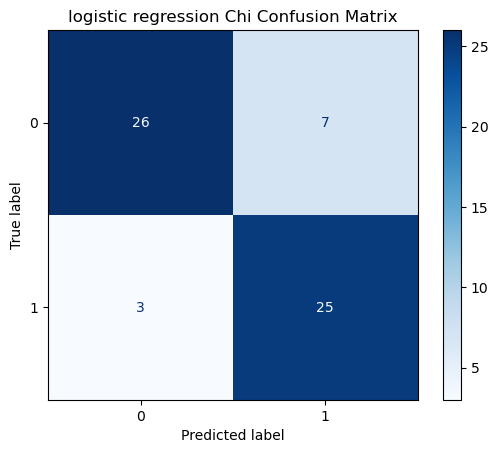

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

logistic regression: train acc: 83.88%, accuracy: 83.61%


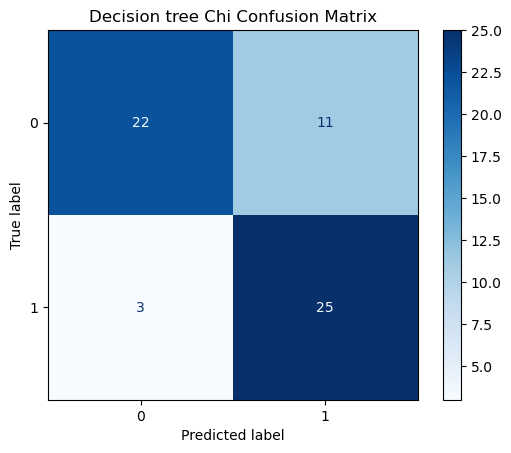

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

Decision tree: train acc: 100.00%, accuracy: 77.05%


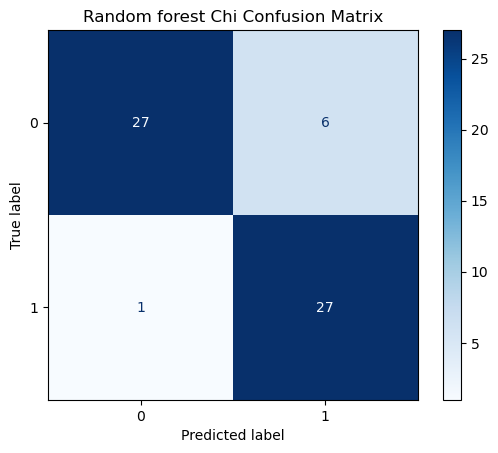

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61

Random forest: train acc: 100.00%, accuracy: 88.52%


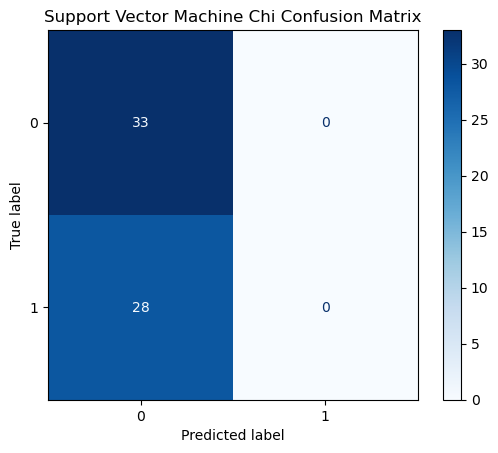

Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

Support Vector Machine: train acc: 54.13%, accuracy: 54.10%


In [7]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name + ' Chi Confusion Matrix')
    plt.show()
    
    print('Classification Report:\n', classification_report(y_test, pred))
    
    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')
    a.append(f"{test_acc:.2f}%")
performance['Test Accuracy'] = a

## Accuracy vs. RFE Features

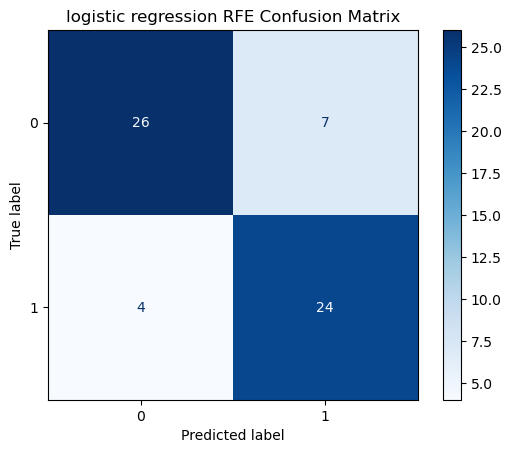

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

logistic regression: train acc: 81.40%, accuracy: 81.97%


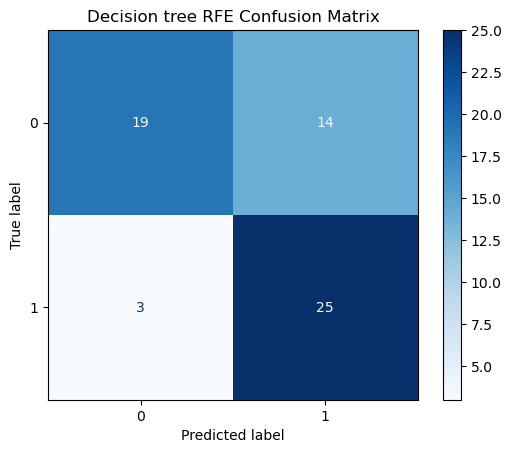

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.58      0.69        33
           1       0.64      0.89      0.75        28

    accuracy                           0.72        61
   macro avg       0.75      0.73      0.72        61
weighted avg       0.76      0.72      0.72        61

Decision tree: train acc: 100.00%, accuracy: 72.13%


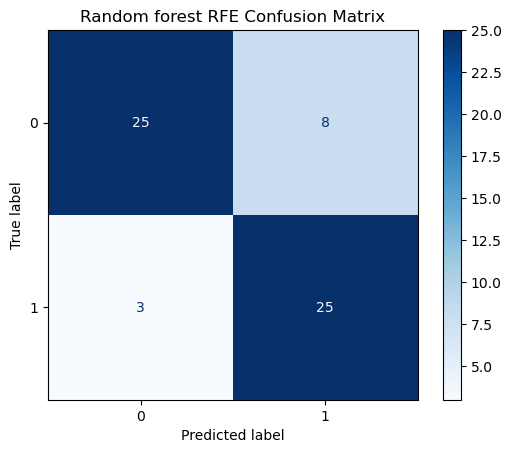

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61

Random forest: train acc: 100.00%, accuracy: 81.97%


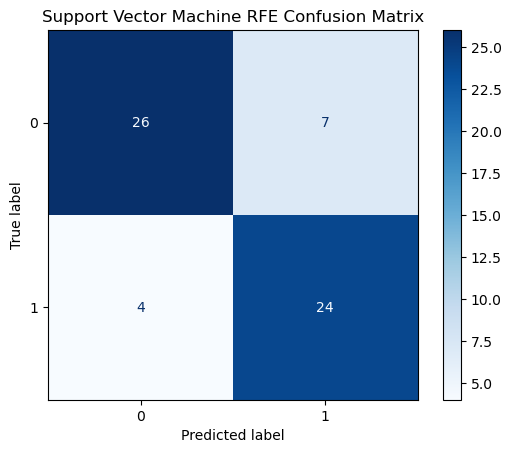

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Support Vector Machine: train acc: 81.40%, accuracy: 81.97%


In [8]:
for model_name, model in models.items():
    model.fit(X_trainr, y_trainr)
    pred = model.predict(X_testr)
    
    cm = confusion_matrix(y_testr, pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name + ' RFE Confusion Matrix')
    plt.show()
    
    print('Classification Report:\n', classification_report(y_testr, pred))
    
    train_acc = accuracy_score(y_trainr, model.predict(X_trainr)) * 100
    test_acc = accuracy_score(y_testr, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')
    b.append(f"{test_acc:.2f}%")
performance['RFE feat. Acc.'] = b

## Accuracy vs. Chi Features

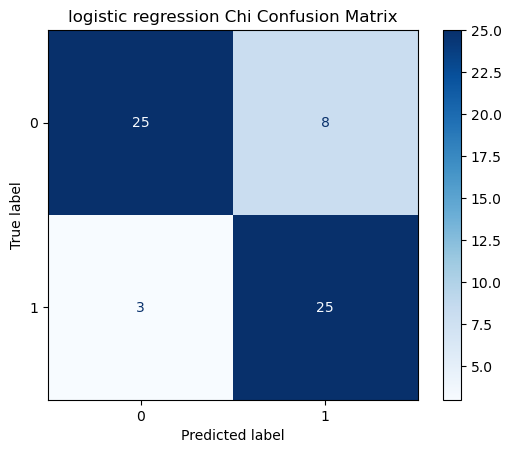

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61

logistic regression: train acc: 83.06%, accuracy: 81.97%


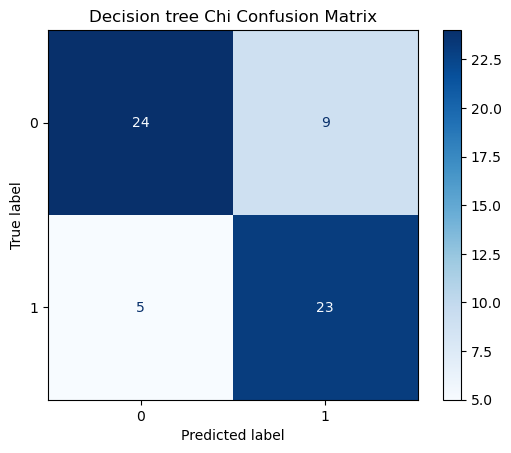

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.72      0.82      0.77        28

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

Decision tree: train acc: 100.00%, accuracy: 77.05%


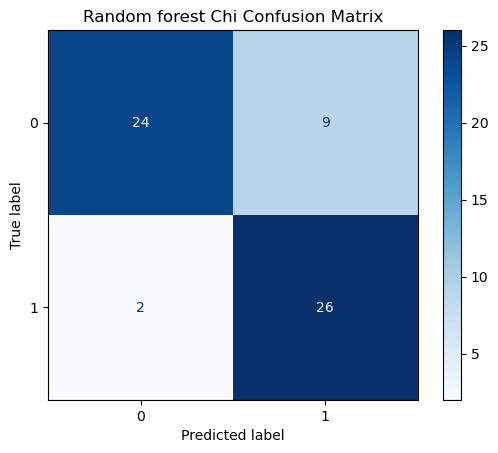

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61

Random forest: train acc: 100.00%, accuracy: 81.97%


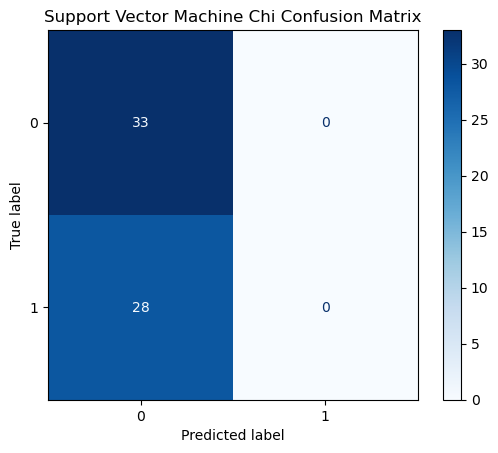

Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

Support Vector Machine: train acc: 54.13%, accuracy: 54.10%


In [9]:
for model_name, model in models.items():
    model.fit(X_trainc, y_trainc)
    pred = model.predict(X_testc)
    
    cm = confusion_matrix(y_testc, pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name + ' Chi Confusion Matrix')
    plt.show()
    
    print('Classification Report:\n', classification_report(y_testc, pred))
    
    train_acc = accuracy_score(y_trainc, model.predict(X_trainc)) * 100
    test_acc = accuracy_score(y_testc, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')
    c.append(f"{test_acc:.2f}%")
performance['Chi feat. Acc.'] = c

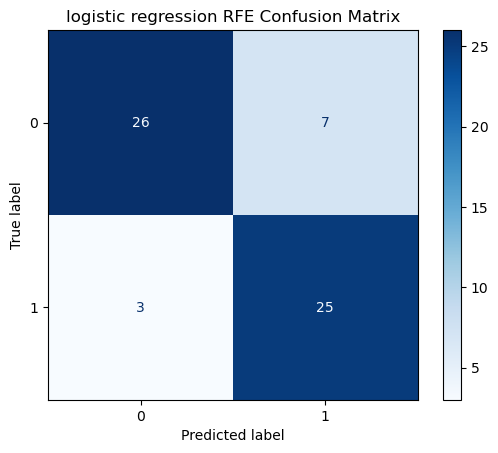

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

logistic regression: train acc: 83.88%, accuracy: 83.61%


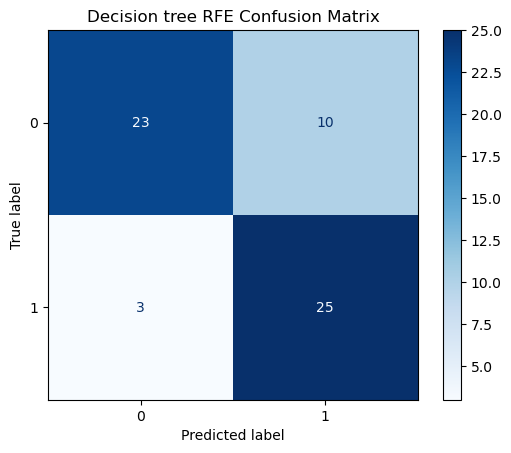

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.71      0.89      0.79        28

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61

Decision tree: train acc: 100.00%, accuracy: 78.69%


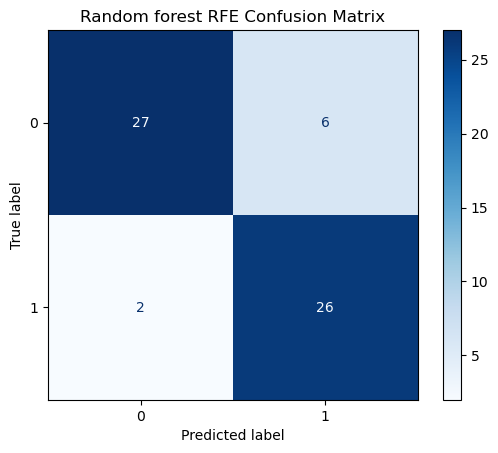

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Random forest: train acc: 100.00%, accuracy: 86.89%


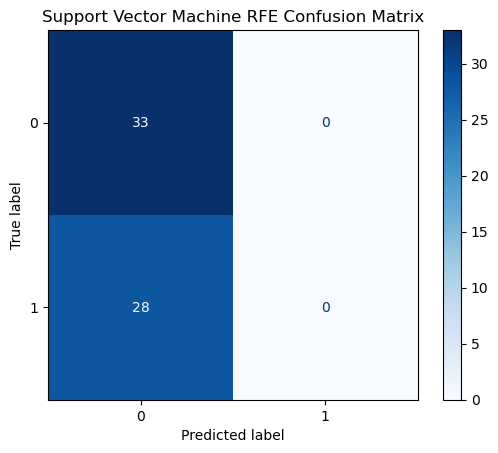

Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

Support Vector Machine: train acc: 54.13%, accuracy: 54.10%


In [10]:
for model_name, model in models.items():
    model.fit(X_trainp, y_trainp)
    pred = model.predict(X_testp)
    
    cm = confusion_matrix(y_testp, pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name + ' RFE Confusion Matrix')
    plt.show()
    
    print('Classification Report:\n', classification_report(y_testp, pred))
    
    train_acc = accuracy_score(y_trainp, model.predict(X_trainp)) * 100
    test_acc = accuracy_score(y_testp, pred) * 100
    print(f'{model_name}: train acc: {train_acc:.2f}%, accuracy: {test_acc:.2f}%')
    d.append(f"{test_acc:.2f}%")
performance['PCA feat. Acc.'] = d

## Performance Comparison

In [11]:
performance

,Model,Test Accuracy,RFE feat. Acc.,Chi feat. Acc.,PCA feat. Acc.
0,Logistic Regression,83.61%,81.97%,81.97%,83.61%
1,Decision Tree,77.05%,72.13%,77.05%,78.69%
2,Random Forest,88.52%,81.97%,81.97%,86.89%
3,Support Vector Machine,54.10%,81.97%,54.10%,54.10%
